In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/MRI dataset/train'
valid_path = '/content/drive/MyDrive/MRI dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/MRI dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MRI dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 180 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MRI dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 73 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
6/6 [==============================] - 68s 11s/step - loss: 1.3163 - accuracy: 0.5722 - val_loss: 0.8260 - val_accuracy: 0.4384
Epoch 2/20
6/6 [==============================] - 4s 602ms/step - loss: 0.6592 - accuracy: 0.6667 - val_loss: 0.2989 - val_accuracy: 0.8767
Epoch 3/20
6/6 [==============================] - 4s 605ms/step - loss: 0.5261 - accuracy: 0.7667 - val_loss: 0.3213 - val_accuracy: 0.8219
Epoch 4/20
6/6 [==============================] - 4s 595ms/step - loss: 0.4126 - accuracy: 0.8111 - val_loss: 0.4165 - val_accuracy: 0.7945
Epoch 5/20
6/6 [==============================] - 4s 588ms/step - loss: 0.3295 - accuracy: 0.8500 - val_loss: 0.3135 - val_accuracy: 0.8904
Epoch 6/20
6/6 [==============================] - 4s 587ms/step - loss: 0.2647 - accuracy: 0.9056 - val_loss: 0.3018 - val_accuracy: 0.8493
Epoch 7/20
6/6 [==============================] - 4s 590ms/step - loss: 0.2567 - accuracy: 0.8778 - val_loss: 0.3476 - val_accuracy: 0.8219
Epoch 8/20
6/6 [=====

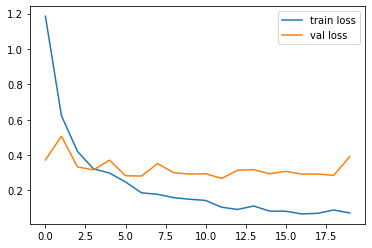

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


KeyError: ignored

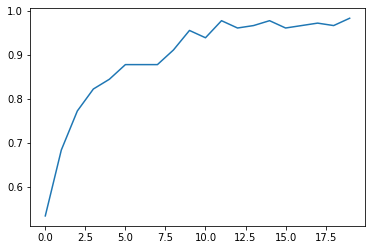

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
#loading trained model
model = load_model('/content/model_vgg16.h5')


In [ ]:
acc = model.evaluate_generator(test_set)[1]
print(f"model accuracy is {acc*100} ")

<ipython-input-19-31580800c2c0>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_set)[1]


model accuracy is 84.93150472640991 


In [ ]:
from tensorflow.keras.preprocessing import image
from keras.models import  load_model
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

1/1 [==============================] - 1s 809ms/step
The MRI scanned image has BrainTumor


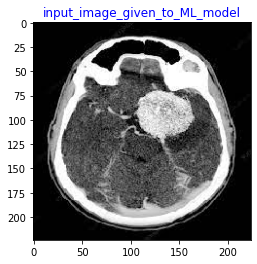

In [ ]:
model = load_model('/content/model_vgg16.h5')
#path='/content/drive/MyDrive/MRI dataset/test/diseased/Y157.jpg'
path= '/content/drive/MyDrive/MRI dataset/testmri.jpeg'

#path ='/content/drive/MyDrive/MRI dataset/BT.jpeg'

img = image.load_img(path , target_size=(224,224))

#normalization done
i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred ==0:
  print("The MRI scanned image has BrainTumor")
else:
  print("The MRI scanned image has no tumor it is healthy")


#image display code
plt.imshow(input_arr[0])
plt.title("input_image_given_to_ML_model",color='blue')
plt.show()




# x = np.expand_dims(x, axis=0)
# img_data = preprocess_input(x)
# classes = model.predict(img_data)
# #test_img = cv2.imread('/content/drive/MyDrive/MRI dataset/test/diseased/Y157.jpg')

In [ ]:
print(filters)

[array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
           6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
         [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
          -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
         [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
           8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
         ...,
         [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
          -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
         [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
           1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
         [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
           2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],

        [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
           2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
         [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
          -3.06594316

In [ ]:

#visualizing intermediate layers outputs
image_path= '/content/drive/MyDrive/MRI dataset/testmri.jpeg'
img = image.load_img(image_path, target_size=(150, 150))
inputs = image.img_to_array(img)                           
inputs=inputs.reshape((1,150,150,3))
print(inputs.shape)
#rescaling image
inputs = inputs/255

NameError: ignored

In [ ]:
# Get all layers feature maps for image
feature_maps = tf.visualize_model.predict(inputs)
print(len(feature_maps)) 

AttributeError: ignored

In [ ]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)


['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'dense']


In [ ]:
import matplotlib.pyplot as plt
import tensorflow
# Get list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
# Create a visualization model
visualize_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

TypeError: ignored

In [ ]:
filters = model.layers[2].get_weights()

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 7.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=a9627293b4b667543c08e18a3a1921dd9c48da122d4d8ae02194e7a70d217416
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb7

block1_conv1
64


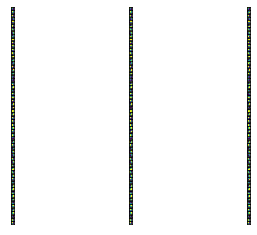

block1_conv2
64


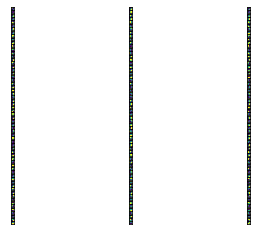

block2_conv1
128


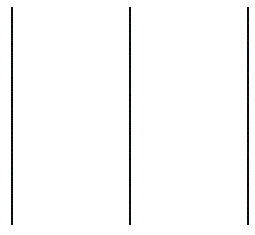

block2_conv2
128


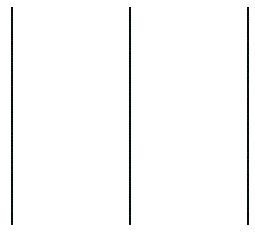

block3_conv1
256


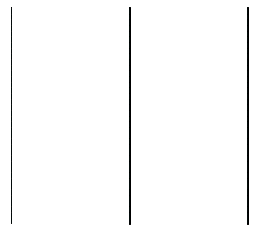

block3_conv2
256


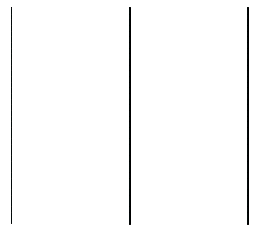

block3_conv3
256


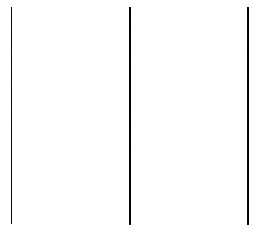

block4_conv1
512


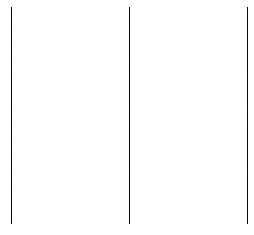

block4_conv2
512


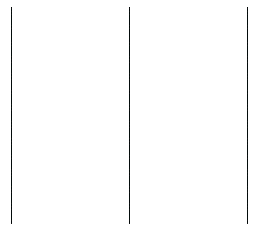

block4_conv3
512


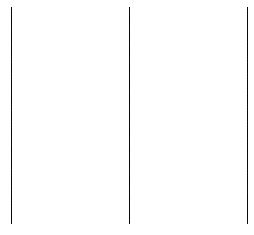

block5_conv1
512


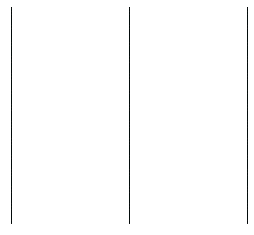

block5_conv2
512


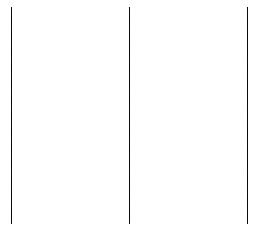

block5_conv3
512


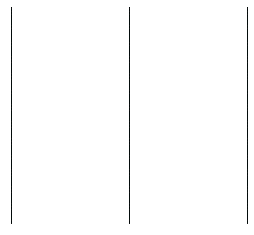

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [ ]:

!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=cfdf704bb2d4163555d1a0b7767c4fff2dfe1e2e307ca7dc41f715d21480ec20
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask_ngrok import run_with_ngrok
from  flask import Flask

from flask import Flask, render_template, request
from keras.models import load_model
from keras.preprocessing import image

app = Flask(__name__)
run_with_ngrok(app)

dic = {0 : 'Cancer', 1 : 'Normal'}

model = load_model('/content/model_vgg16.h5')

model.make_predict_function()

def predict_label(img_path):
	i = image.load_img(img_path, target_size=(224,224))
	i = image.img_to_array(i)/255.0
	i = i.reshape(1, 224,224,3)
	p = model.predict_classes(i)
	return dic[p[0]]


# routes
@app.route("/", methods=['GET', 'POST'])


@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
	if request.method == 'POST':
		img = request.files['my_image']

		img_path = "static/" + img.filename	
		img.save(img_path)

		p = predict_label(img_path)

	return render_template("home.html", prediction = p, img_path = img_path)

if __name__ =='__main__':
	#app.debug = True
	app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://25a9-35-234-160-176.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.8/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-28-c55a3744d37a>", line 39, in get_output
    return render_template("home.html", prediction = p, img_path = img_pat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ngrok authtoken 2KJ5LpA7VZyLJVxqF6X4sOXsYOL_2CyY3J18sVmFgSr9dPzhH

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)
def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")
	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("Streamlit From Colab")	
if __name__ == '__main__':
	main()

Overwriting app.py


In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8504')
public_url

PyngrokNgrokHTTPError: ignored

In [ ]:
python -m http.server 80

SyntaxError: ignored

In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!streamlit run app.py &>/dev/null&